In [3]:
import matplotlib.pyplot as plt
import numpy as np
import zipfile
import pandas as pd

## Unzip file

In [44]:
# Unzip file
with zipfile.ZipFile('fire_nrt_V1_96617.csv.zip', 'r') as zip_ref:
    zip_ref.extractall('data')

## Read Data

In [40]:
fire_data = pd.read_csv('data/fire_nrt_V1_96617.csv')
latitude = fire_data['latitude']
longitude = fire_data['longitude']

## Question 1

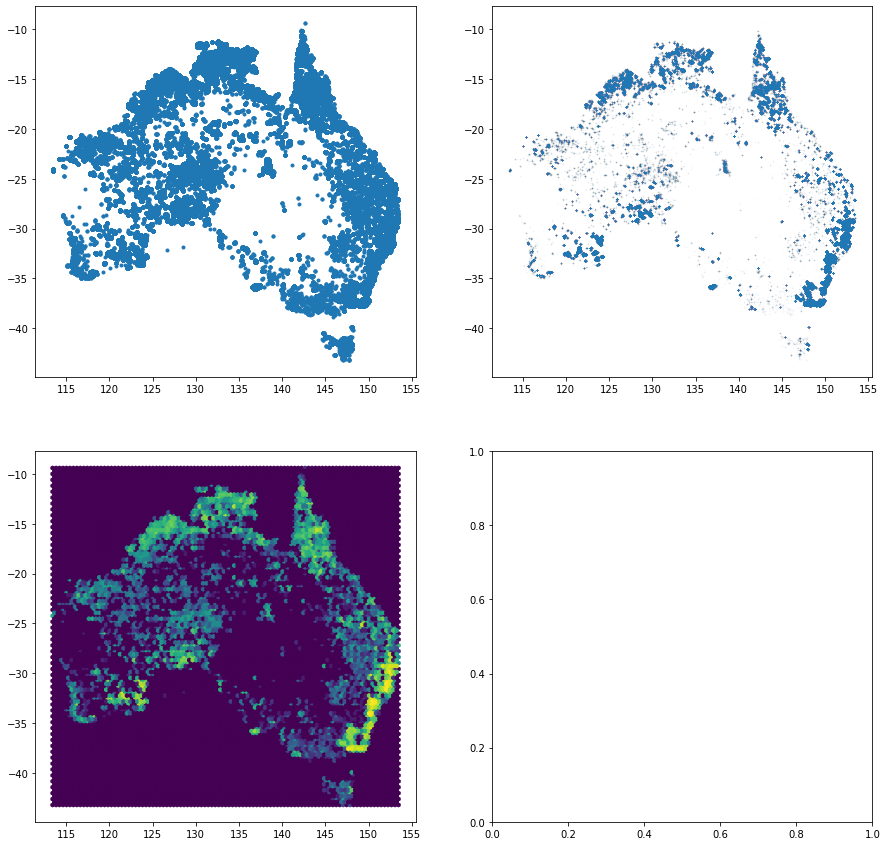

In [43]:
fig, ax = plt.subplots(2,2, figsize=(15,15))
ax1, ax2, ax3, ax4 = ax.ravel()
ax1.plot(longitude, latitude, '.')
ax2.plot(longitude, latitude, '.', markersize='2', alpha=0.01)
ax3.hexbin(longitude, latitude, bins='log')
# Add subsampling method
plt.show()

## Question 2

In [5]:
brightness = fire_data['bright_ti4']

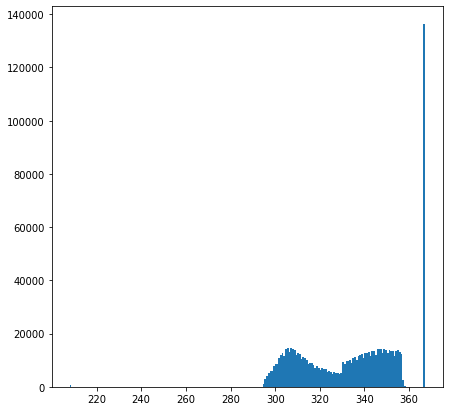

In [60]:
# Add appropriate settings to the data
fig, ax = plt.subplots(figsize=(7,7))
n, bins, _ = ax.hist(brightness, bins='auto')
plt.show()

In [78]:
# All indexes which have atleast one value
cur_len = len(bins)
bin_left = bins[cur_len-2]
bin_right = bins[cur_len-1]
 
# Bin right represents the maximum of the data
# Bin_left to bin_right span all the values in the last bin
saturated = fire_data.loc[fire_data['bright_ti4'] >= bin_right]
non_saturated = fire_data.loc[fire_data['bright_ti4'] < bin_right]

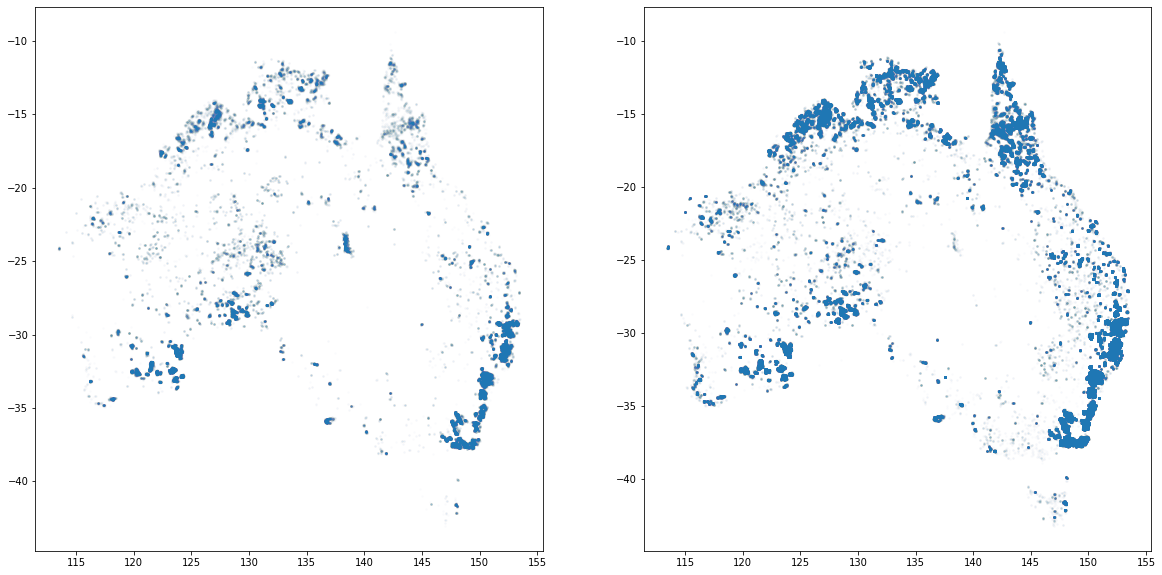

In [79]:
# Plotting saturated and non-saturated
fig, ax = plt.subplots(1,2, figsize=(20,10))
ax1, ax2 = ax.ravel()
ax1.plot(saturated['longitude'], saturated['latitude'], '.', markersize=3, alpha=0.01)
ax2.plot(non_saturated['longitude'], non_saturated['latitude'], '.', markersize=3, alpha=0.01)
plt.show()

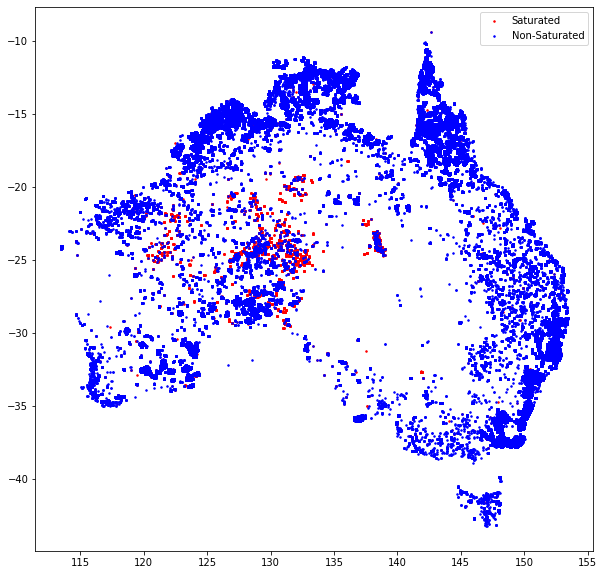

In [80]:
#Plotting values on top of each other 
fig, ax = plt.subplots(1,1, figsize=(10,10))
ax.plot(saturated['longitude'], saturated['latitude'], 'r.', markersize=3)
output = ax.plot(non_saturated['longitude'], non_saturated['latitude'], 'b.', markersize=3)
ax.legend(['Saturated', 'Non-Saturated'], loc='upper right')
plt.show()

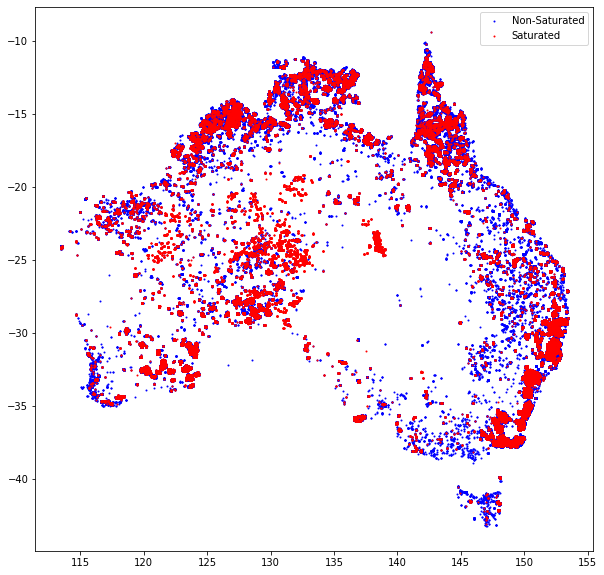

In [81]:
fig, ax = plt.subplots(1,1, figsize=(10,10))
ax.plot(non_saturated['longitude'], non_saturated['latitude'], 'b.', markersize=2)
ax.plot(saturated['longitude'], saturated['latitude'], 'r.', markersize=2)
ax.legend(['Non-Saturated', 'Saturated'], loc='upper right')
plt.show()

In [77]:
# An improved way?
# Do we need to find an improved way to visualize the location spread of saturated values vs non-saturated values?